In [2]:
import os

from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.openai import OpenAIChatCompletionClient

In [3]:
from dotenv import load_dotenv

load_dotenv()

API_KEY = os.getenv("API_KEY")

# Define a tool that searches the web for information.
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# Create an agent that uses the OpenAI GPT-4o model.
model_client = OpenAIChatCompletionClient(
    model="gpt-4o",
    api_key=API_KEY,
)

agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
)



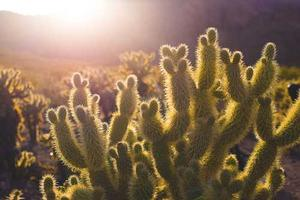

In [4]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img


In [5]:
response = await agent.on_messages([multi_modal_message], CancellationToken())
print(response.chat_message.content)

The image shows a group of cacti in a desert landscape. The sunlight is shining from the background, casting a warm glow over the scene. The cacti are illuminated, highlighting their spines and structure. The setting appears to be during sunrise or sunset due to the angle and color of the light.
